# 1.0 IMPORTS

In [22]:
from sklearn    import datasets as ds
from matplotlib import pyplot   as plt
from sklearn    import cluster  as ct
from sklearn    import metrics  as mt
import numpy as np

# 2.0 LOAD DATASET

In [86]:
X, y = ds.make_blobs( n_samples=100,
               n_features=2,
               centers=3,
               cluster_std=0.3,
               random_state=0
                    )

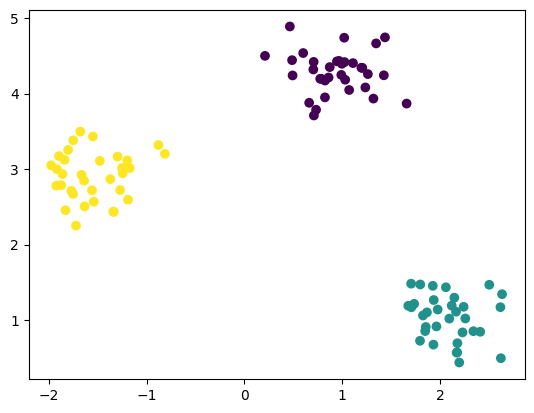

In [87]:
plt.scatter(X[:, 0], X[:, 1], c=y)

# 3.0 TRAINING K-MEANS

In [88]:
clusters = np.arange(2, 11, 1)
ss_list = []

for k in clusters:
    #define
    model = ct.KMeans(n_clusters=k, init='random', n_init=10, random_state=0)

    #fit
    labels = model.fit_predict(X)

    #performance
    ss = mt.silhouette_score(X, labels)
    ss_list.append(ss)
    print('Cluster K: {} - SS: {}'.format(k,ss))
    

Cluster K: 2 - SS: 0.6460859591755024
Cluster K: 3 - SS: 0.8206406418424526
Cluster K: 4 - SS: 0.6618303445950957
Cluster K: 5 - SS: 0.4873990910516539
Cluster K: 6 - SS: 0.33294939264149725
Cluster K: 7 - SS: 0.3571216315384673
Cluster K: 8 - SS: 0.354887086978981
Cluster K: 9 - SS: 0.35149572345034835
Cluster K: 10 - SS: 0.3619277213489209


Text(0, 0.5, 'Silhouette Score AVG')

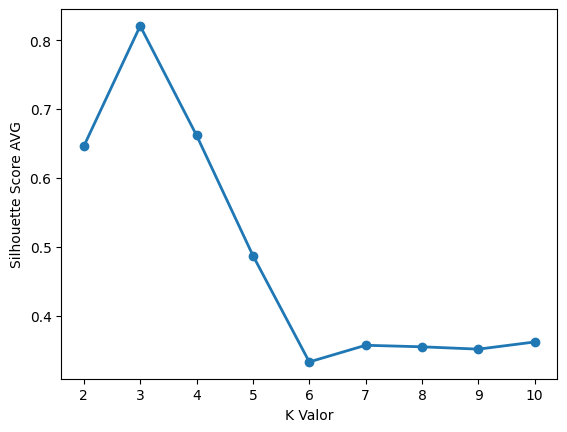

In [89]:
plt.plot(clusters, ss_list, marker='o', linewidth=2)
plt.xlabel('K Valor')
plt.ylabel('Silhouette Score AVG')

# 4.0 FINE TUNNING

Best K: 3


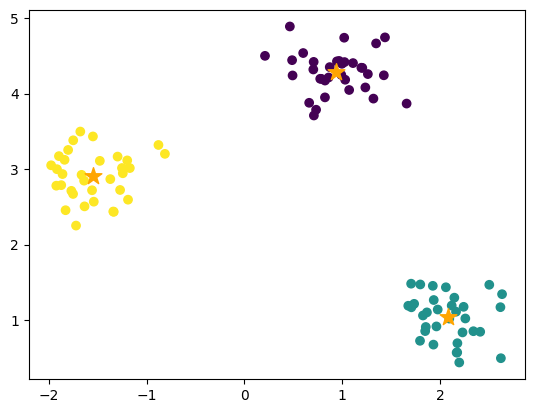

In [90]:
random_state = 0

# Agruapmentos
c = ss_list.index( max( ss_list ) ) + 2
print( 'Best K: {}'.format( c ) )

# define
kmeans = ct.KMeans( n_clusters=c, init='random', n_init=10, random_state=random_state )

# fit
labels = kmeans.fit_predict( X )

# performance
ss_avg = mt.silhouette_score( X, labels )

# draw figure
plt.scatter( X[:, 0], X[:, 1], c=labels )

for i in range( len( kmeans.cluster_centers_ ) ):
    plt.scatter( kmeans.cluster_centers_[i, 0],
                kmeans.cluster_centers_[i, 1],
                marker='*',
                c='orange',
                s=160 )
